### Task : To predict the species of flower using the DecisionTreeClassifier

#### Importing the necessary libraries

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

#### Reading the Iris Dataset

In [24]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.shape

(150, 6)

#### Getting info of the dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Checking if there is null values or not

In [27]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Dropping Id column because it is not required in the analysis

In [33]:
df = df.drop('Id',axis = 1)

#### Performing Exploratory Data Analysis

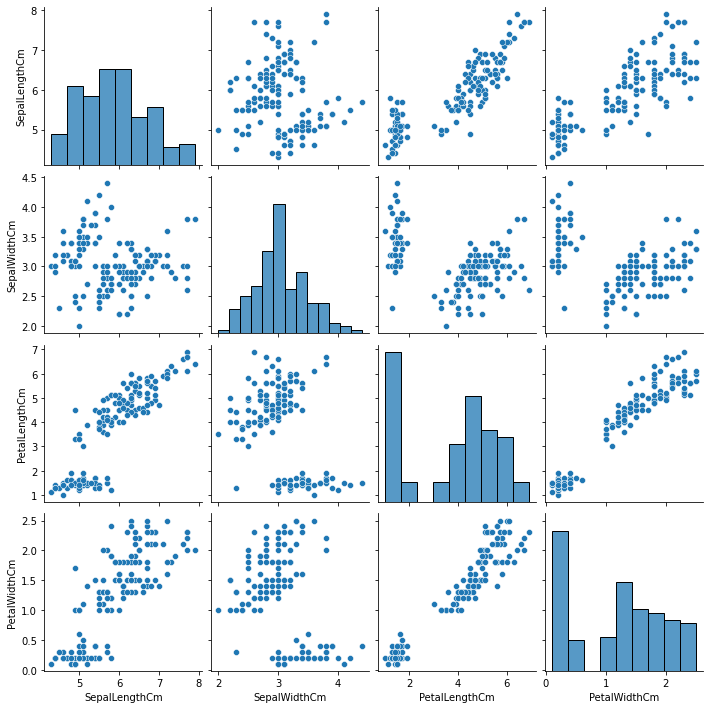

In [34]:
sns.pairplot(df)

#### Checking the corelation between different features

<AxesSubplot:>

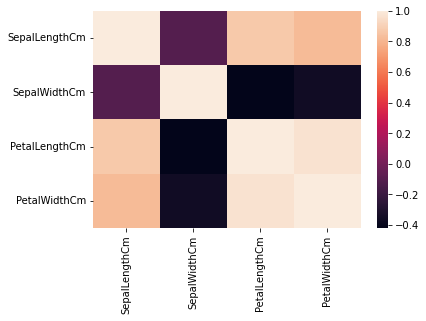

In [35]:
sns.heatmap(df.corr())

               SepalLength Vs. Species



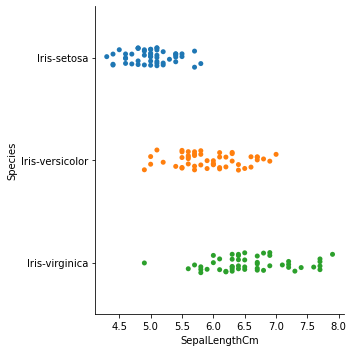

In [45]:
print('               SepalLength Vs. Species\n')
sns.catplot(data=df, x="SepalLengthCm", y="Species")

               SepalWidth Vs. Species



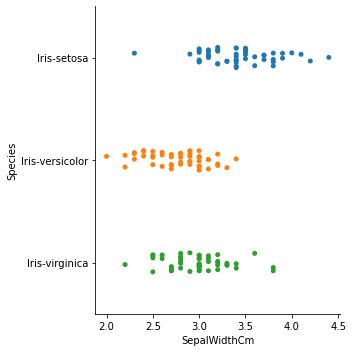

In [46]:
print('               SepalWidth Vs. Species\n')
sns.catplot(data=df, x="SepalWidthCm", y="Species")

               PetalLength Vs. Species



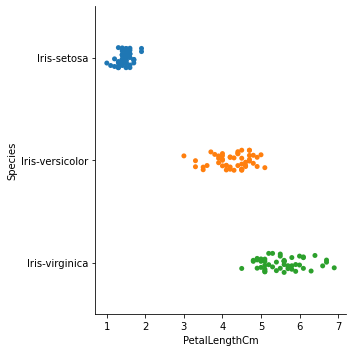

In [47]:
print('               PetalLength Vs. Species\n')
sns.catplot(data=df, x="PetalLengthCm", y="Species")

               PetalLength Vs. Species



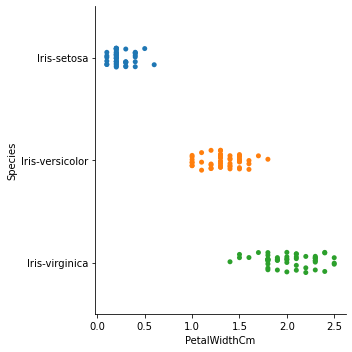

In [48]:
print('               PetalLength Vs. Species\n')
sns.catplot(data=df, x="PetalWidthCm", y="Species")

#### Storing features in X and target in y variables

In [57]:
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df[['Species']]

In [58]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


#### Performing train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

#### Training the decision tree classifier

##### We will first create an instance of the DecisionTreeClassifier called LoanTree. Inside of the classifier, specify criterion = "entropy" so we can see the information gain of each node.

In [63]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

##### Next, we will train the DecisionTreeClassifier

In [64]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction
##### Let's make some predictions 

In [65]:
pred_Tree = Tree.predict(X_test)

In [69]:
print(pred_Tree[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
        Species
47  Iris-setosa
3   Iris-setosa
31  Iris-setosa
25  Iris-setosa
15  Iris-setosa


### Accuracy

##### Let's find the accuracy of our model

In [77]:
print("DecisionTree's Accuracy: ", round(metrics.accuracy_score(y_test,pred_Tree)*100,2),"%")

DecisionTree's Accuracy:  96.67 %


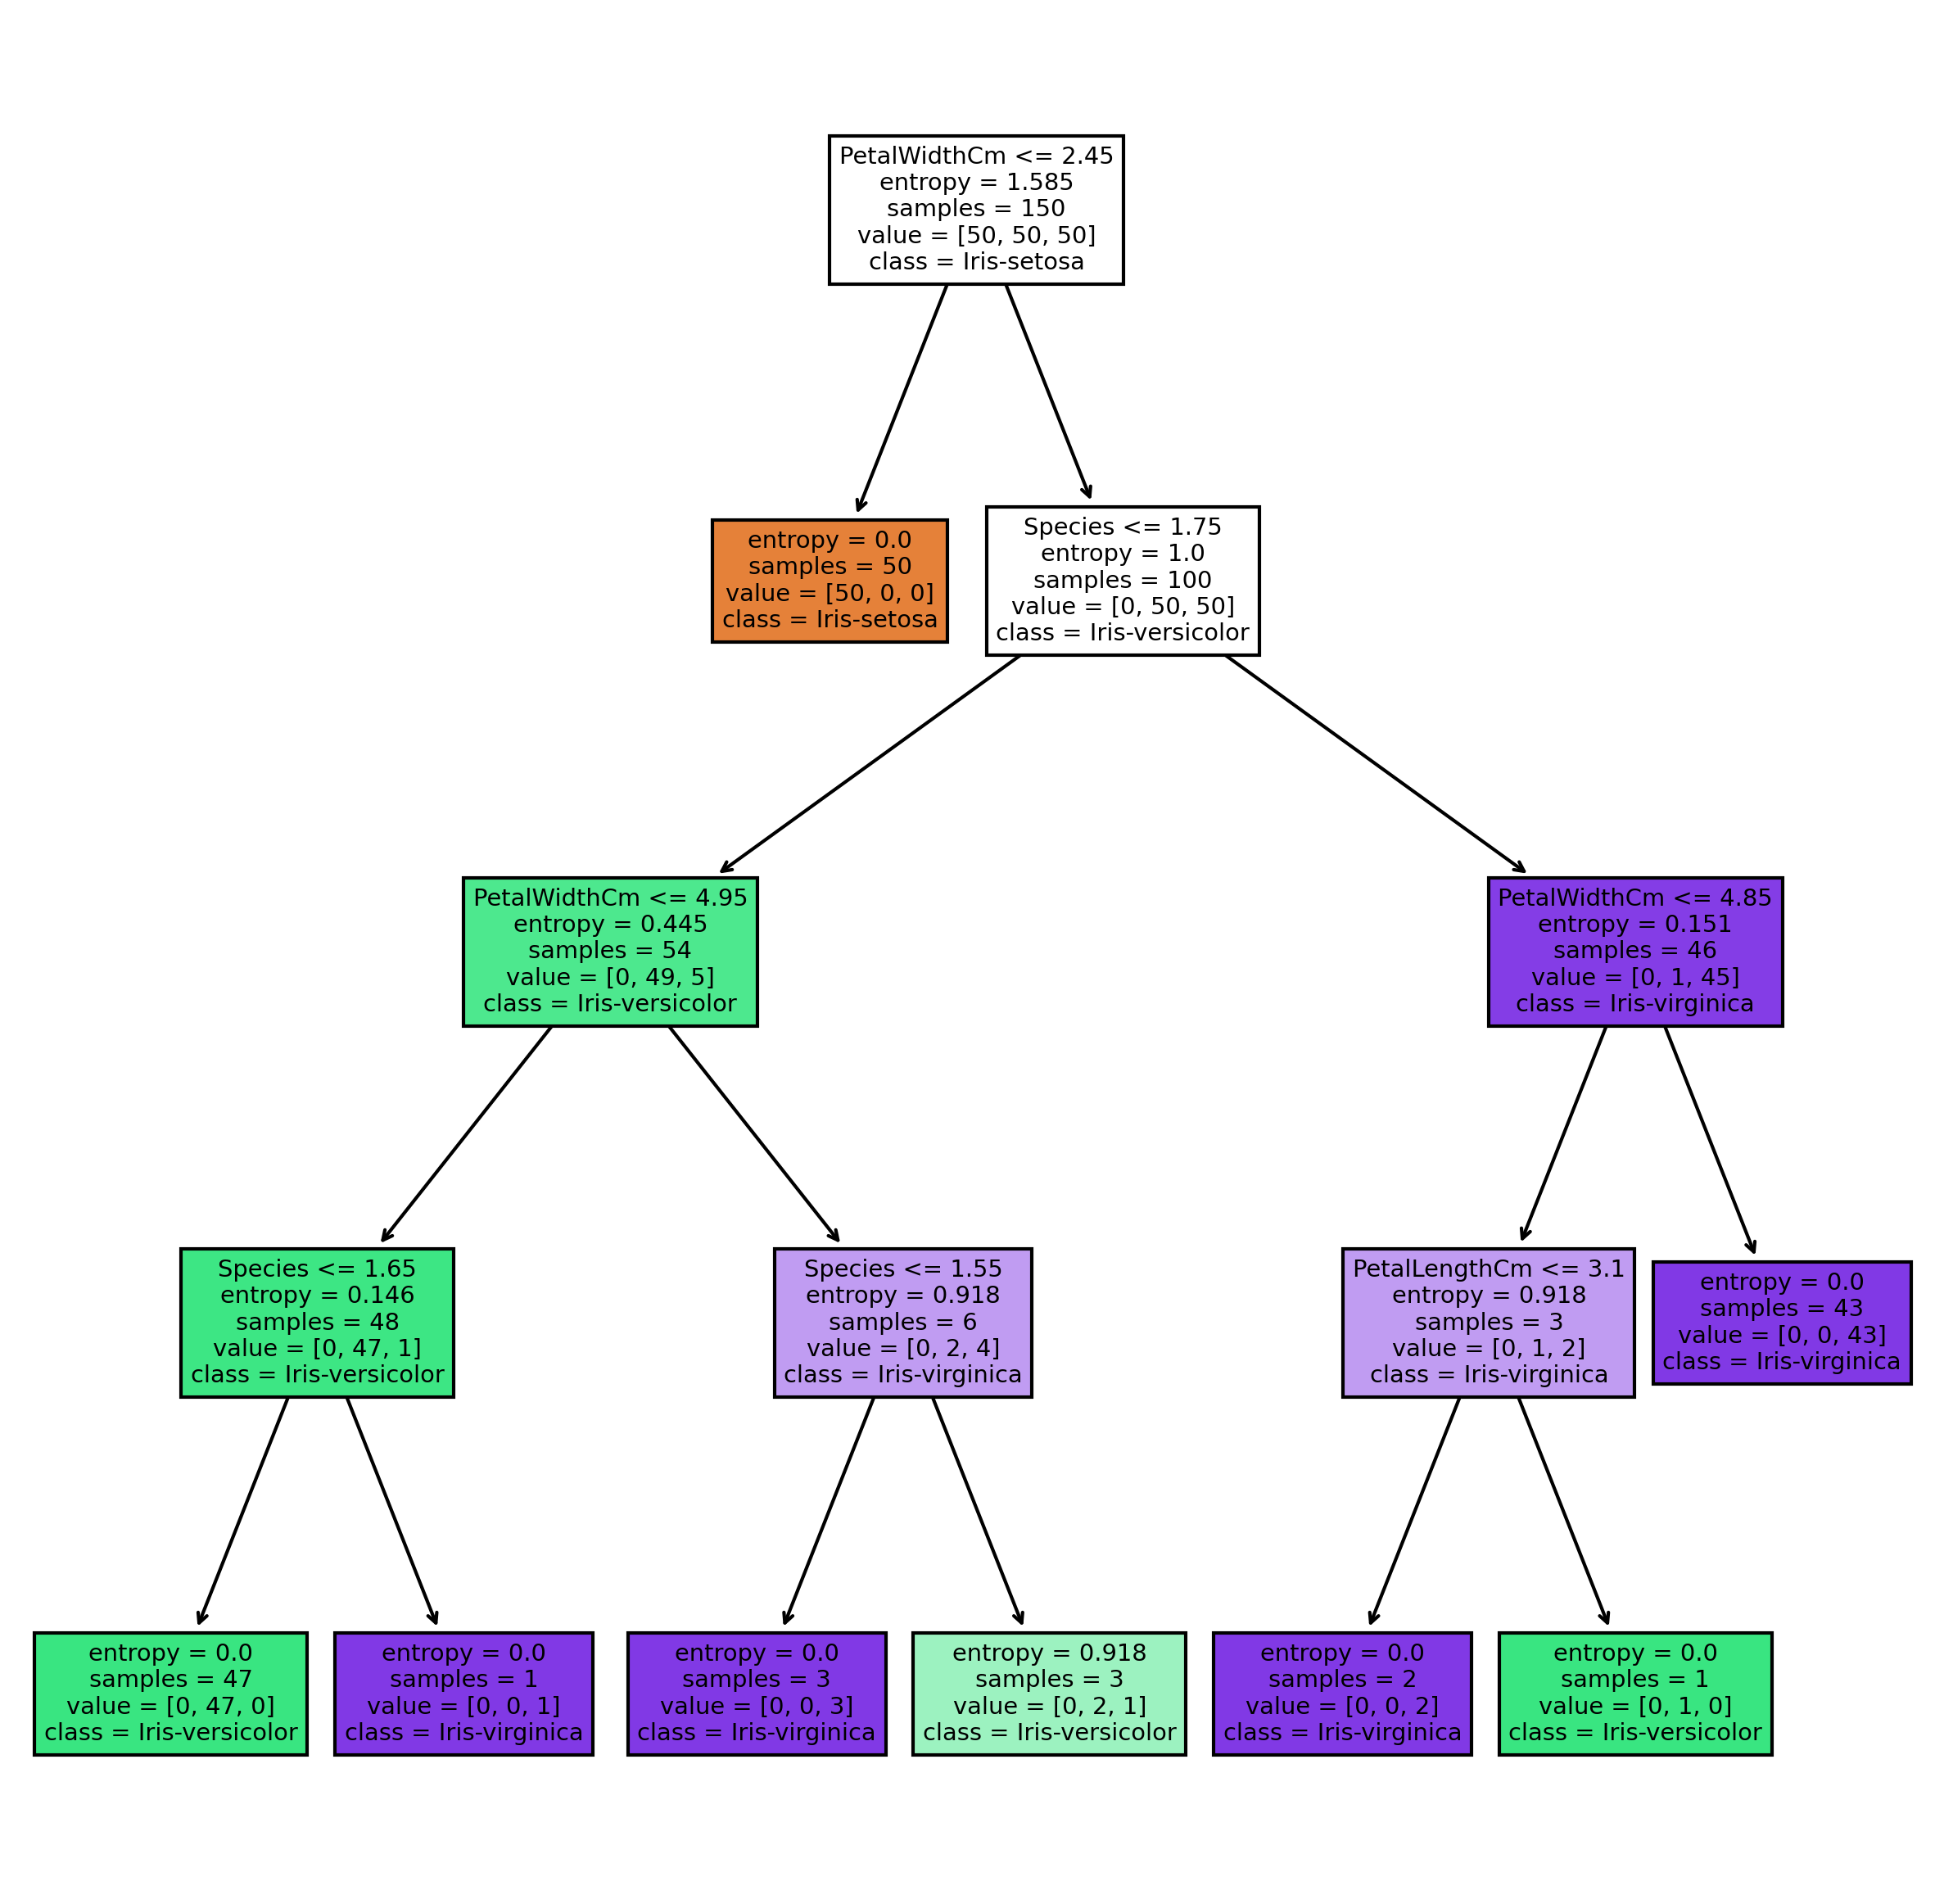

In [78]:
# make an instance of the model
fn = df.columns[1:5]
cn = df['Species'].unique().tolist()
Tree.fit(X,y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi = 300)

tree.plot_tree(Tree,
              feature_names=fn,
              class_names=cn,
              filled = True);

### Prediction of new data

In [90]:
X_new = [[6.7,3.0,6.4,2.3]]

In [91]:
pred = Tree.predict(X_new)

In [92]:
pred

array(['Iris-virginica'], dtype=object)

#### The model has predicted the new data as ' Iris-virginica '